                                        ~ BHARATH BOMMEESHWAR K ~

### <U>OBJECTIVE:
* To build a Optimal Machine learning model to predict the political party of the U.S citizens based on the gathered information.

### <U>FRAME WORK
   - Data acquistion
   - Exploratory Data Analysis
   - Data pre-processing 
   - Building machine learning models and Validating
   - Model testing
   - Conclusion  

### 1. DATA ACQUISITION

####  IMPORTING LIBRARIES AND MODULES

In [659]:
#datastructures and tools
import pandas as pd

#matrices and arrays
import numpy as np

#vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

#to hide harmless warnings
import warnings
warnings.filterwarnings('ignore')

#to work with time computation
import time

#scientific computation

from scipy import stats
import statsmodels.formula.api as sm

# scale the data
from sklearn.preprocessing import StandardScaler
# split the data
from sklearn.model_selection import train_test_split
# cross validation - grid search
from sklearn.model_selection import GridSearchCV
#linear regression model
from sklearn.linear_model import LinearRegression
#knn neighbour model
from sklearn.neighbors import KNeighborsClassifier
#decision tree model
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#Bagging model
from sklearn.ensemble import BaggingClassifier

#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#measure accuracy
from sklearn import metrics
#to get complete classification report
from sklearn.metrics import classification_report
#to fill missing values in dataset
from sklearn.impute import KNNImputer

#to check accuracy 
from sklearn import metrics as mat

#### READING THE FILE

In [581]:
#Importing the Train data set
raw_data=pd.read_excel('tax_payer_data.xlsx')
raw_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [582]:
#dropping name column which will give no inference over prediction of party
raw_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [583]:
#making copy of the data set
data1 = raw_data.copy()
data1.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,Democrat
1,129786,700251,2,5,63,3,0,0,0,Republican
2,268343,493411,2,4,44,1,1,0,1,Independent
3,290506,-433408,1,1,28,5,1,0,1,Republican
4,90108,907135,1,3,57,5,1,1,0,Democrat


#### INFORMATION ABOUT THE DATASET

In [584]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed in 2017   1004 non-null   int64 
 7   Filed in 2016   1004 non-null   int64 
 8   Filed in 2015   1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


* HHI: Household income
* HHDL: Household debt level
* Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
* PoliticalParty: Name of the political party
* CollegeGrads: Grade in College out of 5
* AHHAge: Average household age
* cars: number of cars in house
* Filed in YYYY: Tax filed in given year YYYY       


####  <font color= BLUE> <b> <u>The dataset contains totally 10 variables and 1004 train observations
  - 9 Numerical variables  
  - 1 Categorical variables(Target)  
  

### 2.EXPLORATORY DATA ANALYSIS

#### Finding null values and duplicates

In [585]:
# Identifying the presence of null values
data1.isnull().sum()

HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [629]:
# Checking for any duplicate entries
duplicates=data1.duplicated()
print("Duplicates count:",duplicates.sum())
#data1[duplicates]

#However if the target is imbalanced, it need to balanced by making duplicates(using smote)

Duplicates count: 0


* <font color= BLUE> <b><u> No duplicates and Missing values are found


#### Descriptive statistics

In [587]:
#numerical
data1.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000
mean,153524.522908,-6666.766932,0.970120,2.595618,60.577689,2.447211,0.507968,0.512948,0.50996
std,86167.778113,593751.687936,0.806939,1.687388,24.847991,1.701621,0.500186,0.500081,0.50015
min,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000
25%,82788.500000,-514295.500000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,0.00000
50%,153788.500000,-11331.500000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.00000
75%,228034.000000,526141.250000,2.000000,4.000000,81.000000,4.000000,1.000000,1.000000,1.00000
max,299700.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.00000


In [588]:
#categorical
data1.describe(include="object")

,PoliticalParty
count,1004
unique,3
top,Republican
freq,466


* From the descriptive statistics we can see the most of the continuous variables are normally distributed.(using percentile 50%-25% = 75%-50%)
* The categorical variable present in the data which is also the target has 3groups which has to be determined.
* Further insights can we found from univariate and bivariate analysis

### UNIVARIATE ANALYSIS

#### Numerical variables

Text(0.5, 1.0, 'Box Plot of AHHAge Distribution')

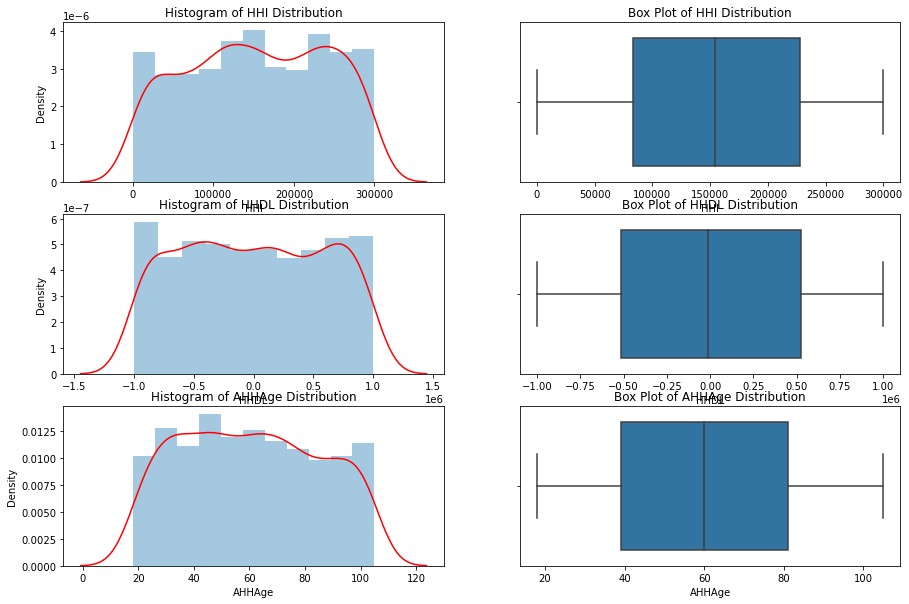

In [589]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,10)

# HHI: Household income

HHI=sns.distplot(data1['HHI'], ax=axes[0][0], kde_kws={"color": "r"})
HHI.set_title('Histogram of HHI Distribution')
HHI=sns.boxplot(data1['HHI'], ax=axes[0][1])
HHI.set_title('Box Plot of HHI Distribution')

# HHDL: Household debt level

HHDL=sns.distplot(data1['HHDL'], ax=axes[1][0], kde_kws={"color": "r"})
HHDL.set_title('Histogram of HHDL Distribution')
HHDL=sns.boxplot(data1['HHDL'], ax=axes[1][1])
HHDL.set_title('Box Plot of HHDL Distribution')

# AHHAge

table=sns.distplot(data1['AHHAge'], ax=axes[2][0], kde_kws={"color": "r"})
table.set_title('Histogram of AHHAge Distribution')
table=sns.boxplot(data1['AHHAge'], ax=axes[2][1])
table.set_title('Box Plot of AHHAge Distribution')


In [590]:
data1.columns

Index(['HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015', 'PoliticalParty'],
      dtype='object')

#### Categorical and Discrete numerical variables

#### Variable - "Married"

In [591]:
#Frequency plots to see the counts
married_table=pd.crosstab(data1.Married,columns="Frequency")
married_table

col_0,Frequency
Married,
0,342
1,350
2,312


<AxesSubplot:xlabel='Married', ylabel='count'>

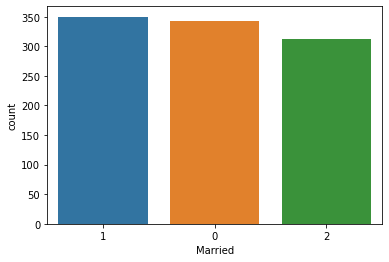

In [592]:
sns.countplot(data1['Married'],order=data1['Married'].value_counts().index)

#### Variable - "CollegGrads"

In [593]:
table=pd.crosstab(data1.CollegGrads,columns="Frequency")
table

col_0,Frequency
CollegGrads,
0,146
1,163
2,174
3,163
4,184
5,174


In [594]:
color_coltotal=table.sum(axis=0)
table.div(color_coltotal,axis=1)*100

col_0,Frequency
CollegGrads,
0,14.541833
1,16.235060
2,17.330677
3,16.235060
4,18.326693
5,17.330677


<AxesSubplot:xlabel='CollegGrads', ylabel='count'>

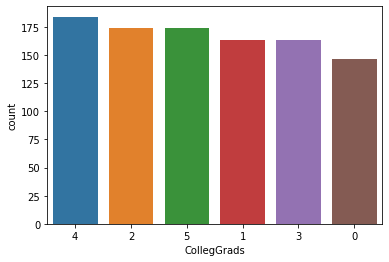

In [595]:
sns.countplot(data1['CollegGrads'],order=data1['CollegGrads'].value_counts().index)

#### Variable - "Cars"

In [596]:
table=pd.crosstab(data1.Cars,columns="Frequency")
table

col_0,Frequency
Cars,
0,174
1,170
2,175
3,157
4,174
5,154


In [597]:
clarity_coltotal=table.sum(axis=0)
table.div(clarity_coltotal,axis=1)*100

col_0,Frequency
Cars,
0,17.330677
1,16.932271
2,17.430279
3,15.637450
4,17.330677
5,15.338645


<AxesSubplot:xlabel='Cars', ylabel='count'>

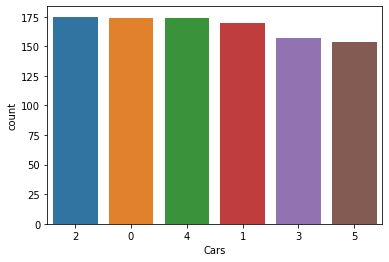

In [598]:
sns.countplot(data1['Cars'],order = data1['Cars'].value_counts().index)

#### Variable - "Filed in 2016"

In [599]:
table=pd.crosstab(data1["Filed in 2016"],columns="Frequency")
table

col_0,Frequency
Filed in 2016,
0,489
1,515


In [600]:
clarity_coltotal=table.sum(axis=0)
table.div(clarity_coltotal,axis=1)*100

col_0,Frequency
Filed in 2016,
0,48.705179
1,51.294821


<AxesSubplot:xlabel='Filed in 2016', ylabel='count'>

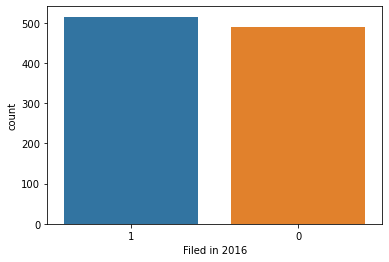

In [601]:
sns.countplot(data1['Filed in 2016'],order = data1['Filed in 2016'].value_counts().index)

#### Variable - "Filed in 2015"

In [602]:
table=pd.crosstab(data1["Filed in 2015"],columns="Frequency")
table

col_0,Frequency
Filed in 2015,
0,492
1,512


In [603]:
clarity_coltotal=table.sum(axis=0)
table.div(clarity_coltotal,axis=1)*100

col_0,Frequency
Filed in 2015,
0,49.003984
1,50.996016


<AxesSubplot:xlabel='Filed in 2015', ylabel='count'>

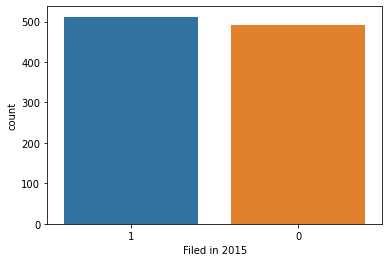

In [604]:
sns.countplot(data1['Filed in 2015'],order = data1['Filed in 2015'].value_counts().index)

#### Variable - "Filed in 2017"

In [605]:
table=pd.crosstab(data1["Filed in 2017"],columns="Frequency")
table

col_0,Frequency
Filed in 2017,
0,494
1,510


In [606]:
clarity_coltotal=table.sum(axis=0)
table.div(clarity_coltotal,axis=1)*100

col_0,Frequency
Filed in 2017,
0,49.203187
1,50.796813


<AxesSubplot:xlabel='Filed in 2017', ylabel='count'>

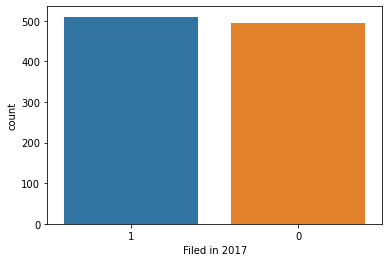

In [607]:
sns.countplot(data1['Filed in 2017'],order = data1['Filed in 2017'].value_counts().index)

### <font color= BLUE> <b><u> Some of the insights from Univariate analysis:
* <b><i> The continuous variables are normally distributed and doesnot seem to have outliers
* <b><i> The percentage of tax paid and not paid by the people is close to same every year 
* <b><i> Majority of the tax paying people has 4 grads in college out of 5 scale

### BIVARIATE ANALYSIS

####  Numerical variables

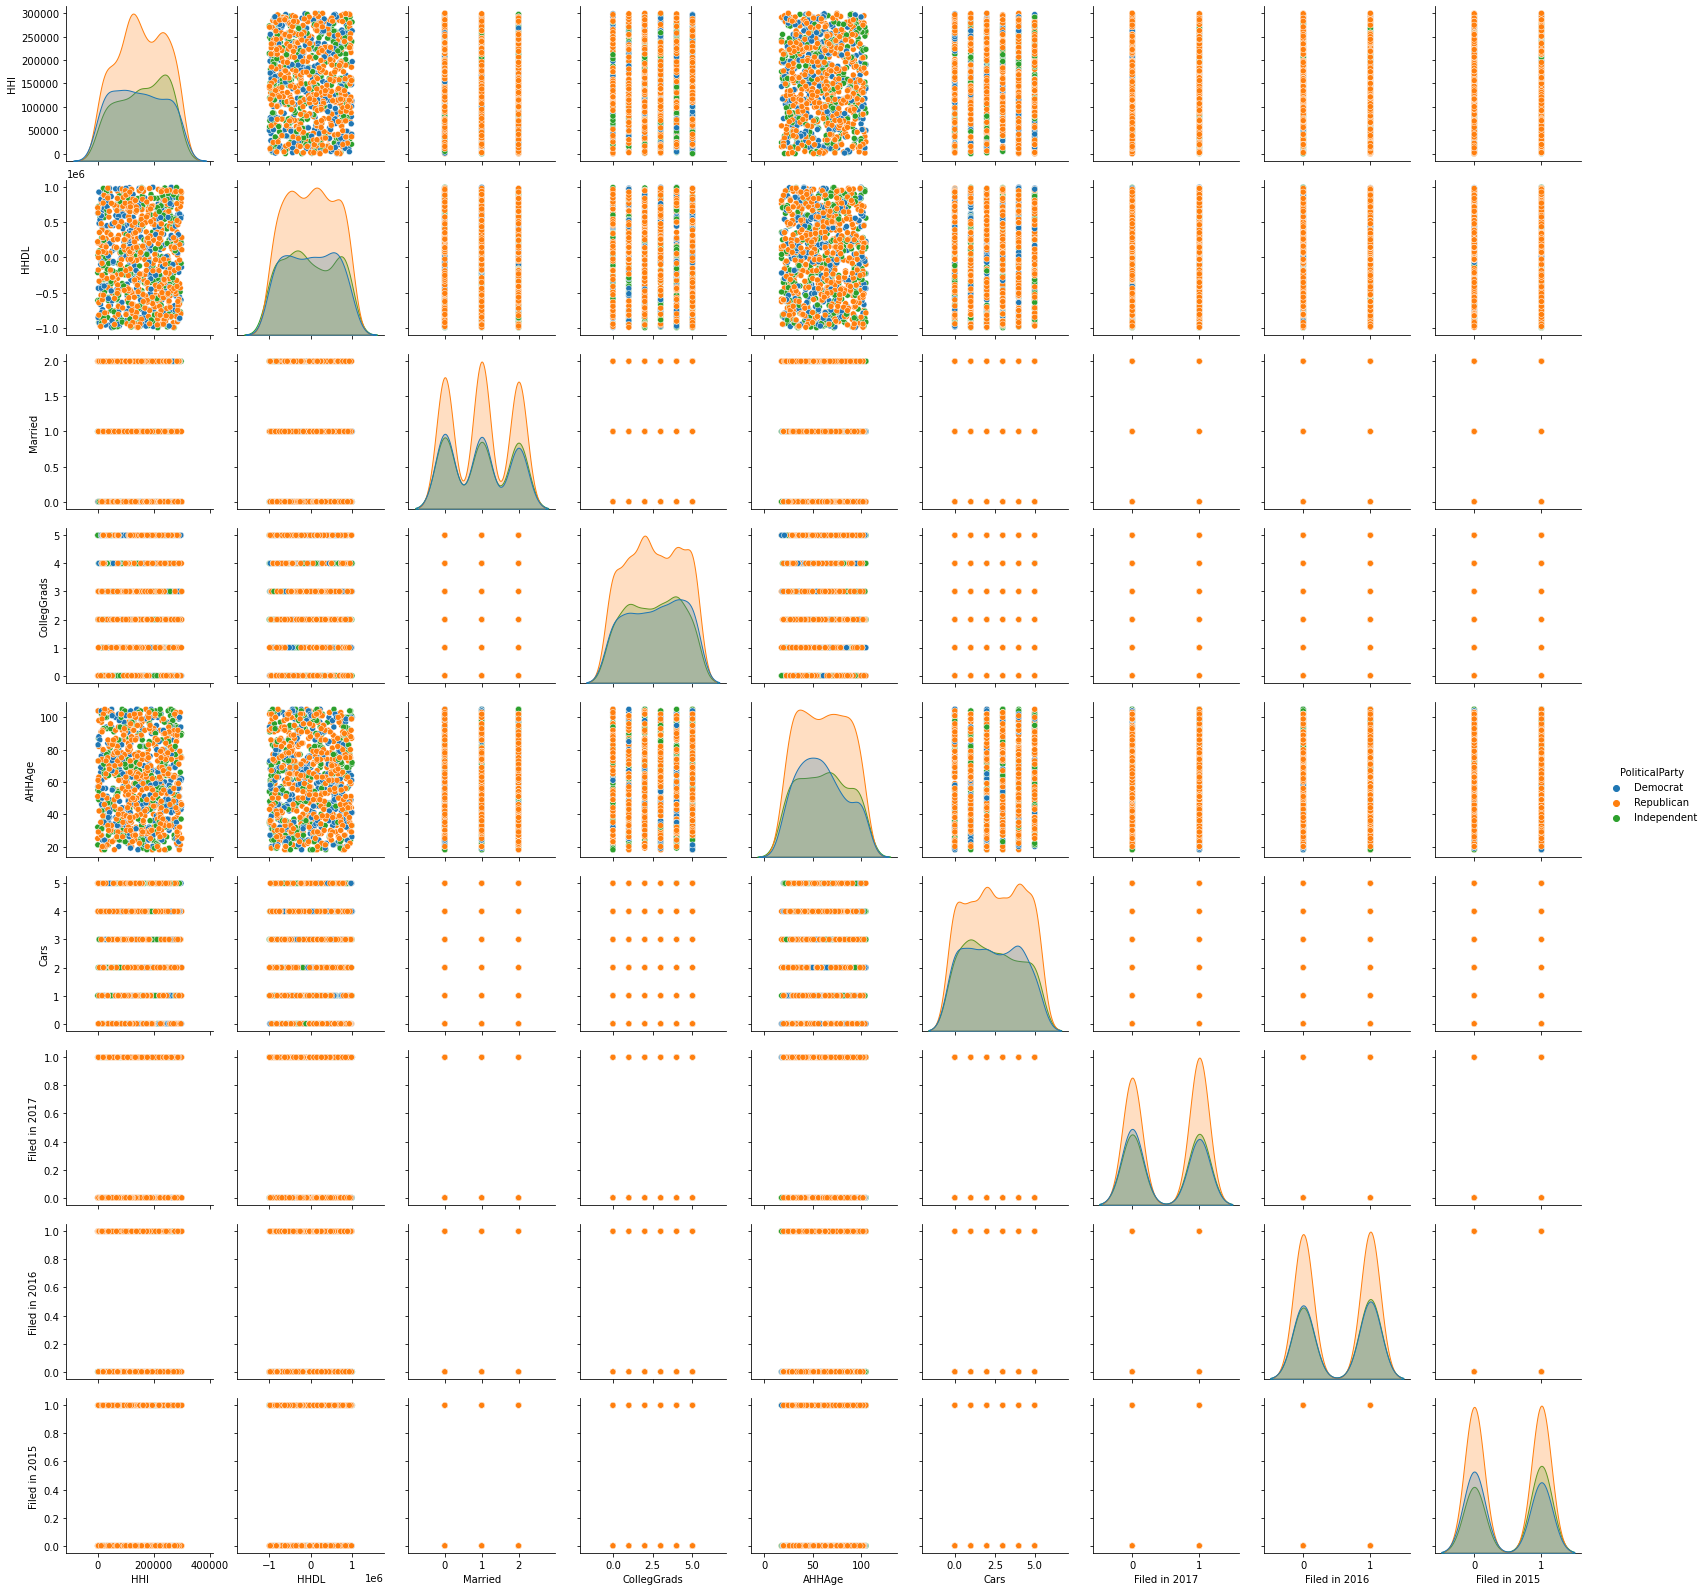

In [608]:
# Pairplot to see the relationship between variables
# sns.relplot(x="HHI", y=[i], hue="PoliticalParty", data=data1)
sns.pairplot(data1,diag_kind='kde',hue="PoliticalParty",palette=["C0", "C1", "C2"])# sns.relplot(x="HHI", y=i, hue="PoliticalParty", data=train_df)

In [609]:
# Correlation between the numerical variables
corr=data1.corr()
corr.style.background_gradient()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
HHI,1.000000,-0.027176,-0.018937,-0.021294,0.020669,-0.008369,0.043239,0.041973,-0.010240
HHDL,-0.027176,1.000000,-0.024053,0.008497,0.026744,-0.008720,0.018930,0.019608,0.017376
Married,-0.018937,-0.024053,1.000000,-0.000096,0.015282,-0.010589,-0.029052,0.015784,-0.043728
CollegGrads,-0.021294,0.008497,-0.000096,1.000000,0.033161,-0.005011,-0.061149,0.006211,0.000052
AHHAge,0.020669,0.026744,0.015282,0.033161,1.000000,0.057102,0.003881,-0.005336,0.009565
Cars,-0.008369,-0.008720,-0.010589,-0.005011,0.057102,1.000000,-0.007119,0.065244,0.042206
Filed in 2017,0.043239,0.018930,-0.029052,-0.061149,0.003881,-0.007119,1.000000,-0.082124,0.023595
Filed in 2016,0.041973,0.019608,0.015784,0.006211,-0.005336,0.065244,-0.082124,1.000000,-0.018454
Filed in 2015,-0.010240,0.017376,-0.043728,0.000052,0.009565,0.042206,0.023595,-0.018454,1.000000


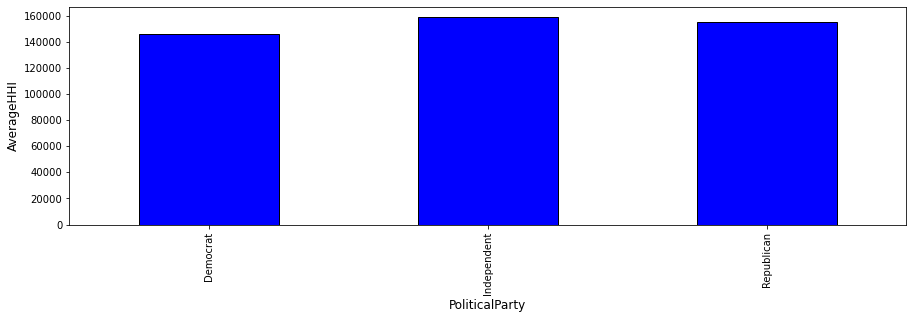

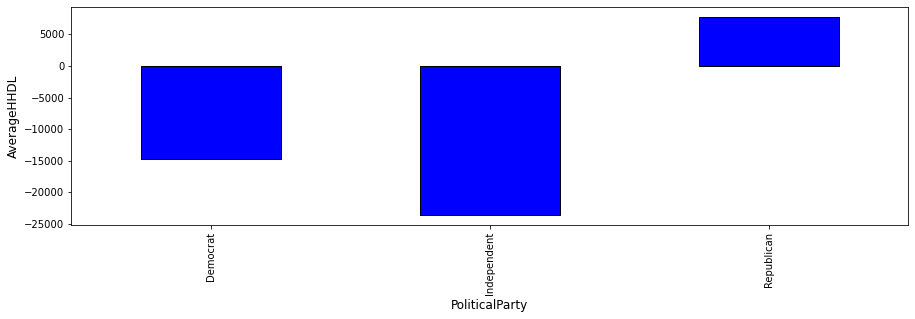

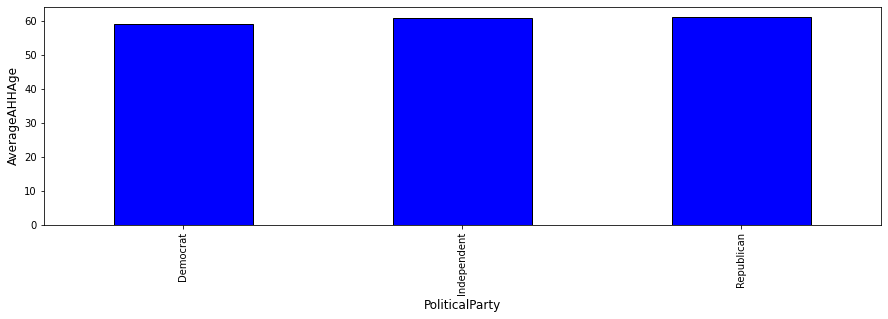

In [610]:
#Barplot showing the average value with respect to each party supporters
cat_disc = ['HHI', 'HHDL','AHHAge']
for i in cat_disc:    
    data1.groupby(['PoliticalParty'])[i].mean().plot(kind='bar',figsize=(15,4),color="blue",fontsize=10,edgecolor="black")
    plt.xlabel('PoliticalParty',fontsize=12)
    plt.ylabel('Average'+ i,fontsize=12)
    plt.show()

### MULTIVARIATE ANALYSIS

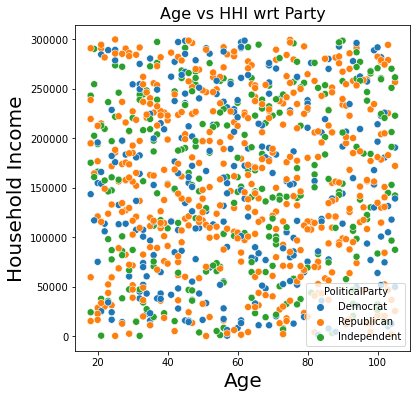

In [616]:
plt.figure(figsize=(6,6))
plt.title("Age vs HHI wrt Party",fontsize=16)
sns.scatterplot(data1.AHHAge,data1.HHI,hue=data1.PoliticalParty,s=50,palette=["C0", "C1", "C2"])
plt.xlabel("Age",fontsize=20)
plt.ylabel("Household Income",fontsize=20)
plt.show()

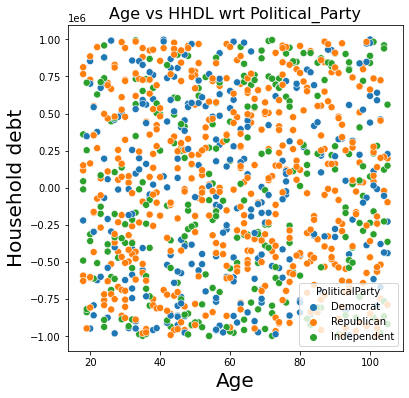

In [617]:
cat_disc = ['HHI', 'HHDL','AHHAge']
plt.figure(figsize=(6,6))
plt.title("Age vs HHDL wrt Political_Party",fontsize=16)
sns.scatterplot(data1.AHHAge,data1.HHDL,hue=data1.PoliticalParty,s=50,palette=["C0", "C1", "C2"])
plt.xlabel("Age",fontsize=20)
plt.ylabel("Household debt",fontsize=20)
plt.show()

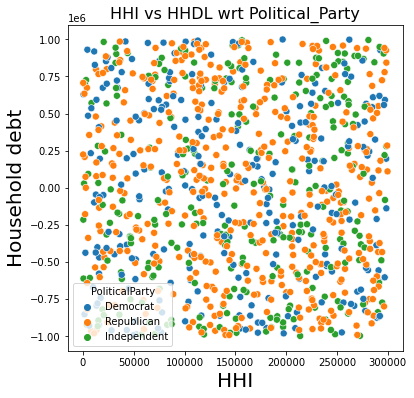

In [618]:
cat_disc = ['HHI', 'HHDL','AHHAge']
plt.figure(figsize=(6,6))
plt.title("HHI vs HHDL wrt Political_Party",fontsize=16)
sns.scatterplot(data1.HHI,data1.HHDL,hue=data1.PoliticalParty,s=50,palette=["C0", "C1", "C2"])
plt.xlabel("HHI",fontsize=20)
plt.ylabel("Household debt",fontsize=20)
plt.show()

####  Discrete Numerical  and Categorical variables

In [619]:
data1.columns

Index(['HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015', 'PoliticalParty'],
      dtype='object')

<Figure size 360x360 with 0 Axes>

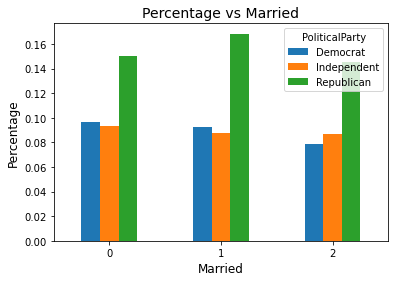

<Figure size 360x360 with 0 Axes>

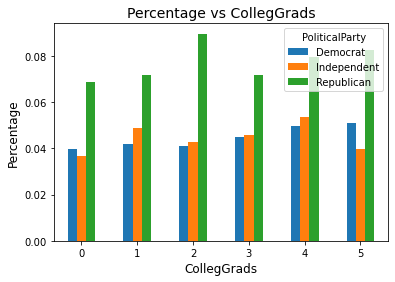

<Figure size 360x360 with 0 Axes>

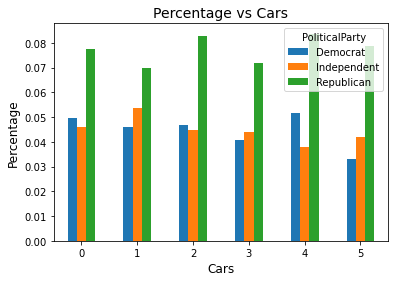

<Figure size 360x360 with 0 Axes>

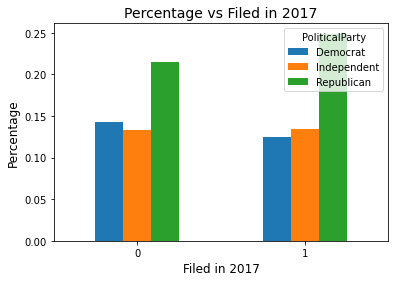

<Figure size 360x360 with 0 Axes>

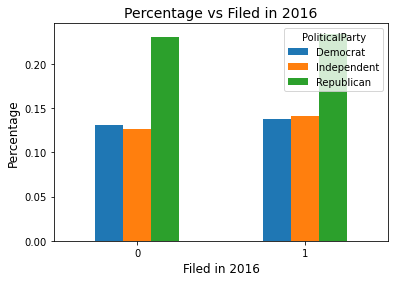

<Figure size 360x360 with 0 Axes>

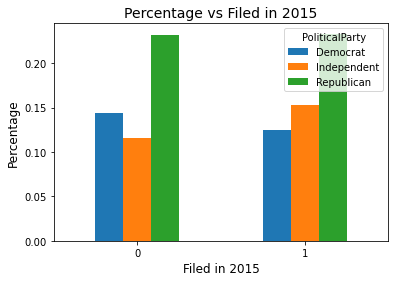

In [620]:
# Groupby aggregate using barplot 

cat_disc = ['Married', 'CollegGrads', 'Cars','Filed in 2017', 'Filed in 2016', 'Filed in 2015']

for i in cat_disc:    
    plt.figure(figsize=(5,5))
    pd.crosstab(data1[i], data1["PoliticalParty"],normalize=True).plot(kind='bar',rot=0)
    
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Percentage',fontsize=12)
    plt.title('Percentage' + ' vs '+i ,fontsize=14)
    plt.show()
   

### <font color= BLUE> <b><u> Some of the insights from Bivariate analysis:
    
* <b><I> From the pair plot we cannot get much inference because most of the variables are discrete and the continuous variables present are uniform with respect to the other continuous variables which shows the variance is less(variance tells the level of information contained)   
* <b><I> There is no inference from multivariate plot to understand people political party,its completely random we couldnt find any pattern
* <b><I> Majority of the people who owes 5cars belongs to Republic party , which shows rich people belongs to Republic party
* <b><I> Majority of the Highly educated(5grads) people belongs to Democratic party    

### 3. DATA PREPROCESSING

In [630]:
#check for meaningless zero values (ex: zero income)
for variable in data1.columns: 
    print("\nVariable: ",variable)
    print(data1.loc[data1[variable]==0]) 


Variable:  HHI
Empty DataFrame
Columns: [HHI, HHDL, Married, CollegGrads, AHHAge, Cars, Filed in 2017, Filed in 2016, Filed in 2015, PoliticalParty]
Index: []

Variable:  HHDL
Empty DataFrame
Columns: [HHI, HHDL, Married, CollegGrads, AHHAge, Cars, Filed in 2017, Filed in 2016, Filed in 2015, PoliticalParty]
Index: []

Variable:  Married
         HHI    HHDL  Married  CollegGrads  AHHAge  Cars  Filed in 2017  \
6     144029 -332420        0            3      90     2              0   
7     157274 -472337        0            1      28     1              1   
9     116951  560163        0            5      50     1              0   
17    154817 -736638        0            3      46     5              0   
18    244708  734172        0            4      33     1              0   
...      ...     ...      ...          ...     ...   ...            ...   
992   250718 -511594        0            5      65     4              0   
995   285706 -626849        0            2      92     3   

#### ENCODING THE TARGET

In [621]:
data1["PoliticalParty"].value_counts()

Republican     466
Democrat       269
Independent    269
Name: PoliticalParty, dtype: int64

* The dataset is highly imbalanced , it shouldbe balanced for the model to train evenly on all classes

In [622]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1["PoliticalParty"] = le.fit_transform(data1["PoliticalParty"])
data1.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,0
1,129786,700251,2,5,63,3,0,0,0,2
2,268343,493411,2,4,44,1,1,0,1,1
3,290506,-433408,1,1,28,5,1,0,1,2
4,90108,907135,1,3,57,5,1,1,0,0


In [623]:
data1["PoliticalParty"] .value_counts()

2    466
0    269
1    269
Name: PoliticalParty, dtype: int64

<font color= BLUE>  
* 0 - Democrat         
* 1 - Independent      
* 2 - Republican       

#### BALANCING THE DATASET USING SMOTE

In [375]:
#pip install imblearn==0.0

In [625]:
X = data1.drop("PoliticalParty",axis=1)
y = data1.PoliticalParty

In [626]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

Class=0, n=466 (33.333%)
Class=2, n=466 (33.333%)
Class=1, n=466 (33.333%)


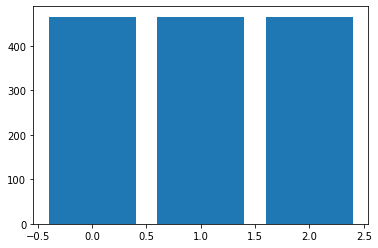

In [628]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

* No meaningless zero value found in the dataset

#### FEATURE ENGINEERING
Note:

The following transformation were made 

* Transformation of variables(log,square,cube,adding two variables, etc)  
* Encoding the variables
* Scaling the variables(standardized,normalized)
* Dropping of variables 

and the model performance is compared with each trials. Only the trials with best performance is shown here.


#### <u> 0nehot encode the nominal and ordinal variables

In [634]:
#Note: usually ordinal variables are not necessary to be encoded,still can be tried based on model performance
X = pd.get_dummies(X,columns=['Married','CollegGrads','Cars'],drop_first=True)
X.head()

,HHI,HHDL,AHHAge,Filed in 2017,Filed in 2016,Filed in 2015,Married_1,Married_2,CollegGrads_1,CollegGrads_2,CollegGrads_3,CollegGrads_4,CollegGrads_5,Cars_1,Cars_2,Cars_3,Cars_4,Cars_5
0,183414,-12402,28,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0
1,129786,700251,63,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,268343,493411,44,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0
3,290506,-433408,28,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,90108,907135,57,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1


In [709]:
# Adding a new variable to the dataset
X['Savings'] = X["HHI"] + X["HHDL"] 

In [638]:
X.columns

Index(['HHI', 'HHDL', 'AHHAge', 'Filed in 2017', 'Filed in 2016',
       'Filed in 2015', 'Married_1', 'Married_2', 'CollegGrads_1',
       'CollegGrads_2', 'CollegGrads_3', 'CollegGrads_4', 'CollegGrads_5',
       'Cars_1', 'Cars_2', 'Cars_3', 'Cars_4', 'Cars_5', 'Savings'],
      dtype='object')

In [639]:
X.head()

,HHI,HHDL,AHHAge,Filed in 2017,Filed in 2016,Filed in 2015,Married_1,Married_2,CollegGrads_1,CollegGrads_2,CollegGrads_3,CollegGrads_4,CollegGrads_5,Cars_1,Cars_2,Cars_3,Cars_4,Cars_5,Savings
0,183414,-12402,28,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,171012
1,129786,700251,63,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,830037
2,268343,493411,44,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,761754
3,290506,-433408,28,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,-142902
4,90108,907135,57,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,997243


#### SPLITTING DATASET

In [654]:
#Splitting the data TRAIN TEST
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [655]:
print(X_train.shape)
print(X_test.shape)

(1048, 19)
(350, 19)


In [656]:
#Splitting the data TRAIN VALIDATION
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.3,random_state=0)

In [657]:
print(X_train.shape)
print(X_valid.shape)

(733, 19)
(315, 19)


### 4.BUILDING MACHINE LEARNING MODELS

#### MODEL PERFORMANCE USING THEIR DEFAULT PARAMETER

In [674]:
#models
dt = DecisionTreeClassifier(random_state=0) #decision tree
rf = RandomForestClassifier(random_state=0) #random forest
ab = AdaBoostClassifier(random_state=0) #adaboost
gb = GradientBoostingClassifier(random_state=0) #gradientboost
knn = KNeighborsClassifier() #knn 
bc = BaggingClassifier(random_state=0) #bagging

In [675]:
# evaluate a model using kfold cross validation
def evaluate_model(X, y, model):
     # 5folds 10times on differnt samples(random state is not specified)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
     # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores)

In [676]:
#cross validation scores 
L = [dt,rf,ab,gb,knn,bc]
for i in L:
    res = evaluate_model(X_train, y_train, i)
    print(i,":",res)
#note: this can be done before splitting the data into validation set    

DecisionTreeClassifier(random_state=0) : 0.409538719597428
RandomForestClassifier(random_state=0) : 0.4658950703569099
AdaBoostClassifier(random_state=0) : 0.4137647935886683
GradientBoostingClassifier(random_state=0) : 0.4278175379740937
KNeighborsClassifier() : 0.3842111639176219
BaggingClassifier(random_state=0) : 0.44020874103065877


* Random forest model is showing high cross validation score

#### MODEL PERFORMANCE USING THEIR OPTIMAL PARAMETER

### <font color= BLUE>DECISION TREE 


In [671]:
#Finding best parameters using grid search cv
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

start = time.time()

# Hyper parameters range intialization for tuning 
param_grid = {
            "max_depth" : [3,5,7,9],
            "min_samples_leaf":[1,2,3,4],
            "max_leaf_nodes":[25,35,45,55],
            "min_samples_split": [2,3,4,5]
           }

#Gridsearch on different combination of parameter
CV_dt2 = GridSearchCV(estimator=dt, param_grid=param_grid, cv = 10)
CV_dt2.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
CV_dt2.best_params_

timetaken: 0.33 min


{'max_depth': 9,
 'max_leaf_nodes': 55,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

#### MODEL VALIDATION

In [677]:
#Fitting tree with best parameters
dt2 = DecisionTreeClassifier(max_depth = 9,max_leaf_nodes = 55,min_samples_leaf= 3,min_samples_split= 4,random_state=0)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=55, min_samples_leaf=3,
                       min_samples_split=4, random_state=0)

In [678]:
#Prediction on validation data
y_pred = dt2.predict(X_valid)

Accuracy : 0.43174603174603177
              precision    recall  f1-score   support

           0       0.38      0.36      0.37       102
           1       0.45      0.48      0.46       105
           2       0.46      0.45      0.46       108

    accuracy                           0.43       315
   macro avg       0.43      0.43      0.43       315
weighted avg       0.43      0.43      0.43       315



<AxesSubplot:>

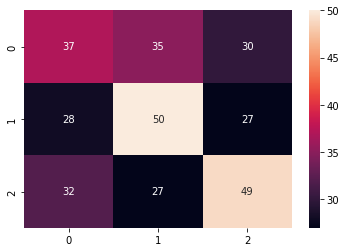

In [679]:
#accuracy score
dt2_acc = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",dt2_acc)

print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE>RANDOM FOREST  

In [182]:
#Finding best parameter for RF model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

start = time.time()

# Hyper parameters range intialization for tuning 
param_grid = {
             "bootstrap": [True, False],
            "max_depth" : range(3,20,3),
            "max_leaf_nodes": range(10,60,10),
            "max_features":["log2","sqrt"],#log2 = log(n_features),sqrt = sqrt(n_features)
            "n_estimators":[100,150,200],
            "min_samples_leaf":[3,4,5],
            "min_samples_split": [2,3,4],
            "criterion" :["gini", "entropy"] #split based on least gini impurity ,high information gain(entropy)
             }

#Gridsearch (5fold_cv) 
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1)
CV_rf.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

#Best parameters
CV_rf.best_params_

timetaken: 99.07453438838323 min


{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

#### MODEL VALIDATION

In [683]:
#Fitting tree with best parameters
rf2 = RandomForestClassifier(criterion='entropy',max_depth = 15,max_features = 'log2',max_leaf_nodes = 10,
                             min_samples_leaf = 5,min_samples_split = 2,n_estimators = 100,bootstrap=True,random_state=0)
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=10, min_samples_leaf=5, random_state=0)

In [684]:
#Prediction on validation data
y_pred = rf2.predict(X_valid)

Accuracy : 0.46984126984126984
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       102
           1       0.46      0.42      0.44       105
           2       0.52      0.53      0.53       108

    accuracy                           0.47       315
   macro avg       0.47      0.47      0.47       315
weighted avg       0.47      0.47      0.47       315



<AxesSubplot:>

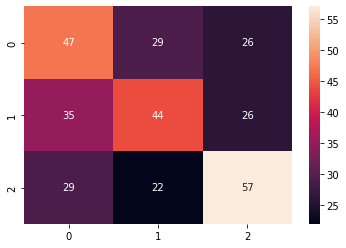

In [685]:
#accuracy score
rf2_acc = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",rf2_acc)

print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> ADAPTIVE BOOSTING

In [686]:
#Finding best parameter for Adaboost model
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

start = time.time()

# Hyper parameters range intialization for tuning  (base_estimator will be decision tree)
param_grid = {
    'n_estimators': range(100, 141, 5),
     }

#Gridsearch on different combination of parameter
CV_ab = GridSearchCV(estimator=ab, param_grid=param_grid, cv= 5)
CV_ab.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
CV_ab.best_params_

timetaken: 0.25 min


{'n_estimators': 140}

#### MODEL VALIDATION

In [687]:
ab2 = AdaBoostClassifier(n_estimators = 140,random_state=0)
ab2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=140, random_state=0)

In [688]:
#Prediction on validation data
y_pred = ab2.predict(X_valid)

Accuracy : 0.4666666666666667
              precision    recall  f1-score   support

           0       0.44      0.43      0.43       102
           1       0.46      0.49      0.47       105
           2       0.51      0.48      0.50       108

    accuracy                           0.47       315
   macro avg       0.47      0.47      0.47       315
weighted avg       0.47      0.47      0.47       315



<AxesSubplot:>

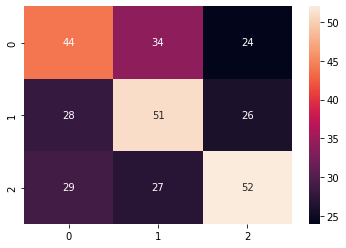

In [689]:
#accuracy score
ab2_acc = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ab2_acc)

print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> GRADIENT BOOSTING

In [203]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[4,6,8],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,500,100)
       }

#Initializing gradient boosting object
gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different conbination of hyperparameters
gb_cv = GridSearchCV(gb, grid, cv = 5)
gb_cv.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("valid Score:",gb_cv.score(X_valid,y_valid))

timetaken: 10.68 min
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}
Train Score: 0.37719658659924143
valid Score: 0.34439834024896265


#### MODEL VALIDATION

In [690]:
gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 6, n_estimators = 300,random_state=0)
gb2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=300,
                           random_state=0)

In [691]:
#Prediction on validation data
y_pred = gb2.predict(X_valid)

Accuracy : 0.5174603174603175
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       102
           1       0.54      0.58      0.56       105
           2       0.49      0.43      0.46       108

    accuracy                           0.52       315
   macro avg       0.52      0.52      0.52       315
weighted avg       0.52      0.52      0.52       315



<AxesSubplot:>

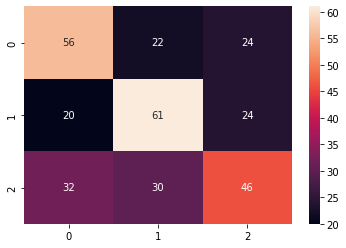

In [692]:
#accuracy score
gb2_acc = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",gb2_acc)

print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> USING KNN MODEL

In [693]:
# Finding the best parameter
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#Initializing knn classifier
knn = KNeighborsClassifier()

#Gridsearch and cross validating on different combination of hyperparameters
knn_cv = GridSearchCV(knn, grid_params, cv = 5,n_jobs=-1,verbose=1)
knn_cv.fit(X_train,y_train)

print("Best Parameters:",knn_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


####  MODEL VALIDATION

In [694]:
#Prediction on validation data 
y_pred = knn_cv.predict(X_valid) 

Accuracy : 0.5333333333333333
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       102
           1       0.56      0.66      0.61       105
           2       0.51      0.39      0.44       108

    accuracy                           0.53       315
   macro avg       0.53      0.53      0.53       315
weighted avg       0.53      0.53      0.53       315



<AxesSubplot:>

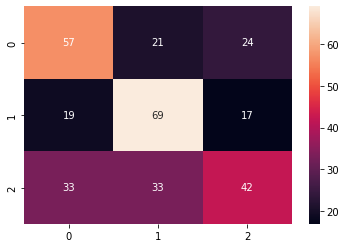

In [695]:
#accuracy score
knn_acc = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",knn_acc)

print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> USING BAGGING CLASSIFIER

In [697]:
# Finding the best parameter
grid_params = { 'n_estimators' : [100,150,200]}

#Initializing knn classifier
bc = BaggingClassifier()

#Gridsearch and cross validating on different combination of hyperparameters
bc_cv = GridSearchCV(bc, grid_params,cv = 5,n_jobs=-1,verbose=1)
bc_cv.fit(X_train,y_train)

print("Best Parameters:",bc_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100}


####  MODEL VALIDATION

In [698]:
#Prediction on validation data 
y_pred = bc_cv.predict(X_valid) 

Accuracy : 0.5206349206349207
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       102
           1       0.58      0.62      0.60       105
           2       0.49      0.45      0.47       108

    accuracy                           0.52       315
   macro avg       0.52      0.52      0.52       315
weighted avg       0.52      0.52      0.52       315



<AxesSubplot:>

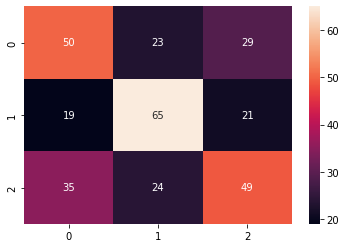

In [699]:
#accuracy score
bc_acc = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",bc_acc)

print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,annot=True)

### 5.MODEL TESTING

In [708]:
#Decision tree
y_pred1 = dt2.predict(X_test)
dt2_test = mat.accuracy_score(y_test,y_pred1)
#print("Accuracy :",dt2_test)
#Random forest
y_pred2 = rf2.predict(X_test)
rf2_test = mat.accuracy_score(y_test,y_pred2)
#print("Accuracy :",rf2_test)
#Adaptive boosting
y_pred3 = ab2.predict(X_test)
ab2_test = mat.accuracy_score(y_test,y_pred3)
#print("Accuracy :",ab2_test)
#Gradient Boosting
y_pred4 = gb2.predict(X_test)
gb2_test = mat.accuracy_score(y_test,y_pred4)
#print("Accuracy :",gb2_test)
#Knn model
y_pred5 = knn_cv.predict(X_test)
knn_test = mat.accuracy_score(y_test,y_pred5)
#print("Accuracy :",knn_test)
#Bagging model
y_pred6 = bc_cv.predict(X_test)
bc_test = mat.accuracy_score(y_test,y_pred6)
#print("Accuracy :",bc_test)

In [707]:
final_result = pd.DataFrame({"Validation score":[dt2_acc,rf2_acc,ab2_acc,gb2_acc,knn_acc,bc_acc],
                             "Test score":[dt2_test,rf2_test,ab2_test,gb2_test,knn_test,bc_test]
                      },index=["Decision tree","Random forest","Adaptive boosting",
                              "Gradient boosting","Knn model","Bagging classifier"])
final_result

,Validation score,Test score
Decision tree,0.431746,0.402857
Random forest,0.469841,0.451429
Adaptive boosting,0.466667,0.400000
Gradient boosting,0.517460,0.480000
Knn model,0.533333,0.517143
Bagging classifier,0.520635,0.488571


### 6. CONCLUSION

* <b>Various models on different transformations of data are trained for predicting the political party of the people.
* <b> Knn model performed the best compared to rest of the model however its time complex on a huge data.
* <b>More variables/Information can be added to improve the accuracy of prediction since the information contained in the data
  doesnot contain information to a greater extent for predictions which was found from our exploratory data analysis.